In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
scores_data = '/content/drive/MyDrive/Lumiere/Data/Not used/scores.csv'

In [ ]:
scores = pd.read_csv(scores_data)


In [ ]:
print(scores.describe())


            days     gender        age    afftype    melanch  inpatient  \
count  55.000000  55.000000  55.000000  23.000000  20.000000  23.000000   
mean   12.600000   1.454545  40.363636   1.739130   1.950000   1.782609   
std     2.491467   0.502519  12.249510   0.540824   0.223607   0.421741   
min     5.000000   1.000000  22.000000   1.000000   1.000000   1.000000   
25%    13.000000   1.000000  32.000000   1.000000   2.000000   2.000000   
50%    13.000000   1.000000  42.000000   2.000000   2.000000   2.000000   
75%    13.000000   2.000000  49.500000   2.000000   2.000000   2.000000   
max    20.000000   2.000000  67.000000   3.000000   2.000000   2.000000   

        marriage       work     madrs1     madrs2  
count  23.000000  23.000000  23.000000  23.000000  
mean    1.521739   1.869565  22.739130  20.000000  
std     0.510754   0.344350   4.797892   4.729021  
min     1.000000   1.000000  13.000000  11.000000  
25%     1.000000   2.000000  18.500000  16.000000  
50%     2.00

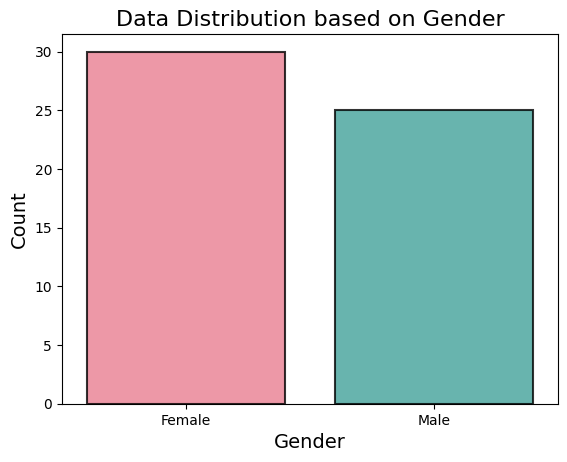

In [ ]:
# Define the new labels
new_labels = [ "Female","Male"]

# Visualize distribution of depression types
ax = sns.countplot(x="gender", data=scores, order=[1, 2], palette="husl",
              edgecolor="black", linewidth=1.5, saturation=0.8,
              alpha=0.8, label="Count")

# Set x-axis tick labels
ax.set_xticklabels(new_labels)

# Add axis labels and title
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Data Distribution based on Gender", fontsize=16)

# Show the plot
plt.show()


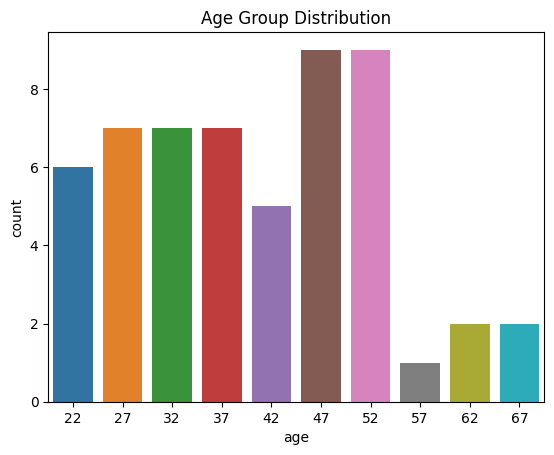

In [ ]:
# Visualize distribution of age groups
sns.countplot(x="age", data=scores)
plt.title("Age Group Distribution")
plt.show()


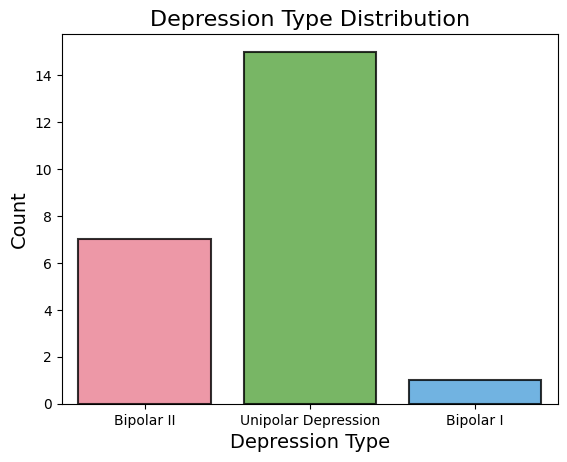

In [ ]:
# Define the new labels
new_labels = [ "Bipolar II","Unipolar Depression","Bipolar I"]
#1: bipolar II, 2: unipolar depressive, 3: bipolar I

# Visualize distribution of depression types
ax = sns.countplot(x="afftype", data=scores, order=[1, 2, 3], palette="husl",
              edgecolor="black", linewidth=1.5, saturation=0.8,
              alpha=0.8, label="Count")

# Set x-axis tick labels
ax.set_xticklabels(new_labels)

# Add axis labels and title
plt.xlabel("Depression Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Depression Type Distribution", fontsize=16)

# Show the plot
plt.show()


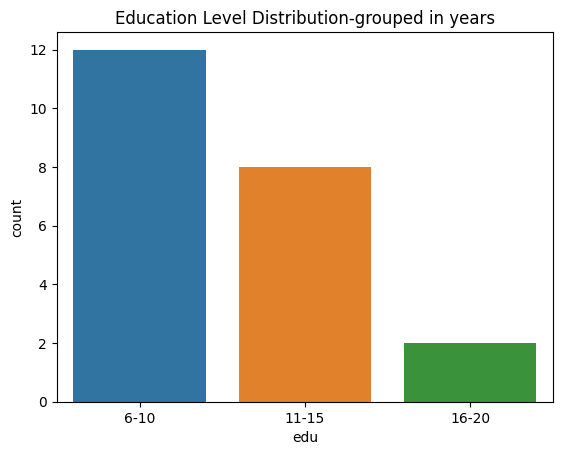

In [ ]:
# Visualize distribution of education levels
sns.countplot(x="edu", data=scores)
plt.title("Education Level Distribution-grouped in years")
plt.show()

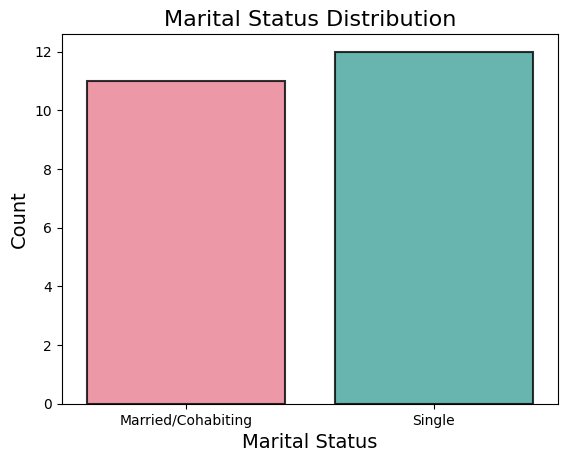

In [ ]:
# Define the new labels
new_labels = ["Married/Cohabiting", "Single"]

# Visualize distribution of marital status
sns.countplot(x="marriage", data=scores, order=[1, 2], palette="husl",
              edgecolor="black", linewidth=1.5, saturation=0.8,
              alpha=0.8, label="Count")

# Set x-axis tick labels
plt.xticks([0, 1], new_labels)

# Add axis labels and title
plt.xlabel("Marital Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Marital Status Distribution", fontsize=16)

# Show the plot
plt.show()


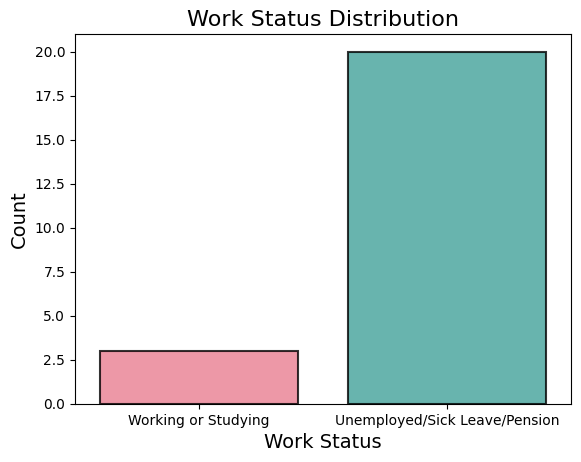

In [ ]:
# Define the new labels
work_labels = ["Working or Studying", "Unemployed/Sick Leave/Pension"]

# Visualize distribution of work status
ax = sns.countplot(x="work", data=scores, palette="husl",
                   edgecolor="black", linewidth=1.5, saturation=0.8,
                   alpha=0.8, label="Count")

# Set x-axis tick labels
ax.set_xticklabels(work_labels)

# Add axis labels and title
plt.xlabel("Work Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Work Status Distribution", fontsize=16)

# Show the plot
plt.show()


In [ ]:
scores_condition = scores[scores.number.str.contains('condition')].copy()


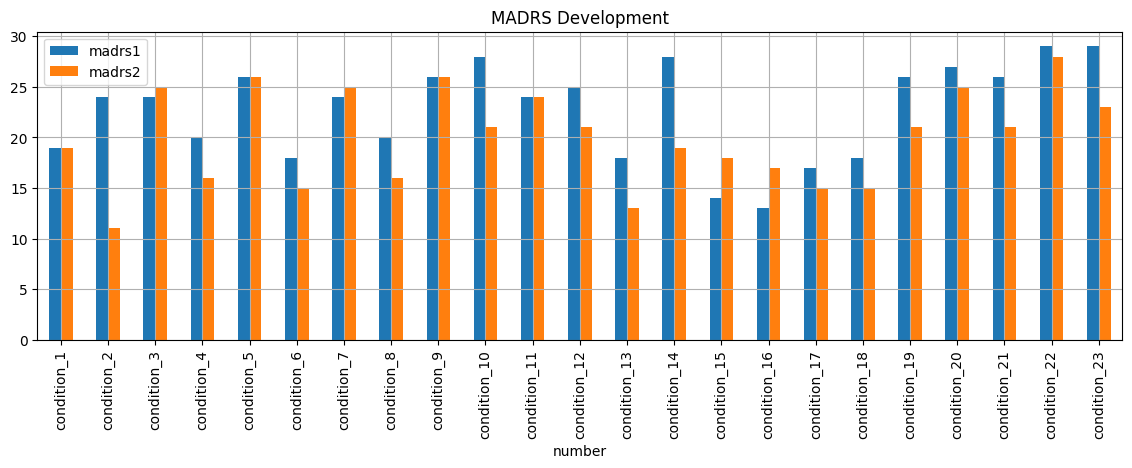

In [ ]:
# barplot of MADRS scores (before/after)
temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
scores_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras

In [ ]:
import os
import pandas as pd

# Load and process actigraph data for each patient
activity_data = []

base_path = "/content/drive/MyDrive/Lumiere/Data"

for patient_id in scores["number"]:
    for folder in ["condition", "control"]:
        file_path = os.path.join(base_path, f"{folder}/{patient_id}.csv")
        if os.path.exists(file_path):
            patient_activity = pd.read_csv(file_path)
            patient_activity["patient_id"] = patient_id
            patient_activity["group"] = folder
            activity_data.append(patient_activity)

# Check if activity_data is not empty before concatenating
if not activity_data:
    raise ValueError("No patient activity data was loaded.")
else:
    # Concatenate all patient activity data into a single DataFrame
    activity_data = pd.concat(activity_data)

print(activity_data.head())


             timestamp        date  activity   patient_id      group
0  2003-05-07 12:00:00  2003-05-07         0  condition_1  condition
1  2003-05-07 12:01:00  2003-05-07       143  condition_1  condition
2  2003-05-07 12:02:00  2003-05-07         0  condition_1  condition
3  2003-05-07 12:03:00  2003-05-07        20  condition_1  condition
4  2003-05-07 12:04:00  2003-05-07       166  condition_1  condition


In [ ]:
merged_data = activity_data.merge(scores, left_on="patient_id", right_on="number")


In [ ]:
# Print basic information about the merged dataset
print(merged_data.info())
print(merged_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571706 entries, 0 to 1571705
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   timestamp   1571706 non-null  object 
 1   date        1571706 non-null  object 
 2   activity    1571706 non-null  int64  
 3   patient_id  1571706 non-null  object 
 4   group       1571706 non-null  object 
 5   number      1571706 non-null  object 
 6   days        1571706 non-null  int64  
 7   gender      1571706 non-null  int64  
 8   age_range   1571706 non-null  object 
 9   age         1571706 non-null  int64  
 10  afftype     551716 non-null   float64
 11  melanch     489924 non-null   float64
 12  inpatient   551716 non-null   float64
 13  edu         529944 non-null   object 
 14  marriage    551716 non-null   float64
 15  work        551716 non-null   float64
 16  madrs1      551716 non-null   float64
 17  madrs2      551716 non-null   float64
dtypes: float64(7), int64(4

CONDITION

In [ ]:
condition_1_path='/content/drive/MyDrive/Lumiere/Data/condition/condition_1.csv'

In [ ]:
condition_1=pd.read_csv(condition_1_path)

In [ ]:
condition_1.head()

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166


In [ ]:
condition_1.shape

(23244, 3)

In [ ]:
#hourly:
condition_1['hour'] = condition_1.timestamp.str.split(':', expand=True)[[0]]
condition_1['hour']

0        2003-05-07 12
1        2003-05-07 12
2        2003-05-07 12
3        2003-05-07 12
4        2003-05-07 12
             ...      
23239    2003-05-23 15
23240    2003-05-23 15
23241    2003-05-23 15
23242    2003-05-23 15
23243    2003-05-23 15
Name: hour, Length: 23244, dtype: object

In [ ]:
ab = condition_1.groupby(['date', 'hour'])['activity'].sum()
condition_1_aggr = pd.DataFrame(columns=('date','hour','activity'))
for i in range(0,len(ab)):
    condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
condition_1_aggr

<ipython-input-22-cb0c22150faa>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
<ipython-input-22-cb0c22150faa>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
<ipython-input-22-cb0c22150faa>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
<ipython-input-22-cb0c22150faa>:4: FutureWarning: The frame.append method is deprecated and will be removed from pa

,date,hour,activity
0,2003-05-07,2003-05-07 12,20793
1,2003-05-07,2003-05-07 13,17074
2,2003-05-07,2003-05-07 14,16751
3,2003-05-07,2003-05-07 15,13127
4,2003-05-07,2003-05-07 16,14313
...,...,...,...
383,2003-05-23,2003-05-23 11,0
384,2003-05-23,2003-05-23 12,0
385,2003-05-23,2003-05-23 13,0
386,2003-05-23,2003-05-23 14,684


In [ ]:
import math
from matplotlib.ticker import MultipleLocator


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors as pc

# Define a colormap
colormap = 'Viridis'

# Define the number of rows and columns in the grid of plots
num_dates = 8
num_rows = 2
num_cols = num_dates // num_rows

# Create a figure with subplots
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=condition_1_aggr.date.unique()[:num_dates])

# Iterate through the unique dates and create a subplot for each date
for index, current_date in enumerate(condition_1_aggr.date.unique()[:num_dates]):
    row = index // num_cols + 1
    col = index % num_cols + 1

    selected_data = condition_1_aggr.loc[condition_1_aggr['date'] == current_date]
    activity = min(selected_data['activity'].mean(), 999)

    # Set the line color based on the activity value
    colorscale = pc.sequential.Viridis
    color_index = activity / 1000
    line_color = colorscale[int(color_index * (len(colorscale)-1))]

    # Add a trace for the activity data
    fig.add_trace(go.Scatter(x=selected_data['hour'], y=selected_data['activity'], mode='lines', line=dict(color=line_color, width=2)),
                  row=row, col=col)

    # Set subplot title and axis labels
    fig.update_xaxes(title_text="Hour", title_font=dict(size=12, color="black"),
                     tickfont=dict(size=10, color="black"), showgrid=True, gridwidth=0.5, gridcolor='LightGrey', row=row, col=col)
    fig.update_yaxes(title_text="Activity", title_font=dict(size=12, color="black"),
                     tickfont=dict(size=10, color="black"), showgrid=True, gridwidth=0.5, gridcolor='LightGrey', row=row, col=col)
    fig.update_layout(title_text="Activity by Date", title_font=dict(size=14, color="black"), font=dict(size=10, color="black"))


# Adjust the layout and display the grid of plots
fig.update_layout(height=800, width=1000, showlegend=False, plot_bgcolor="white")
fig.show()


<ipython-input-25-0920a023ffab>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

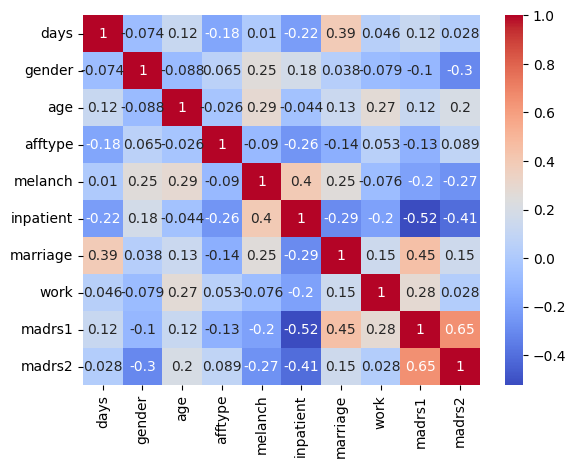

In [ ]:
import seaborn as sns
# Compute correlation matrix
corr = scores.corr()

# Generate heatmap of correlation matrix
sns.heatmap(corr, cmap="coolwarm", annot=True)


In [ ]:
import plotly.express as px
import pandas as pd

# Load data


# Merge data on patient ID

# Compute correlation matrix
corr_matrix = merged_data.corr()

# Create heatmap using Plotly
fig = px.imshow(corr_matrix,
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale=px.colors.diverging.RdYlBu_r)

# Update layout and display figure
fig.update_layout(title="Correlation Heatmap",
                  width=700,
                  height=700)
fig.show()


<ipython-input-26-06d36b20b1fb>:10: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



MISSING DATA

In [ ]:
# Check for missing values in scores dataframe
missing_values = scores.isnull().sum()

# Print columns with missing values and their count
for col, count in missing_values.items():
    if count > 0:
        print(f"{col}: {count}")


afftype: 32
melanch: 35
inpatient: 32
edu: 33
marriage: 32
work: 32
madrs1: 32
madrs2: 32


In [ ]:
scores_clean = scores.dropna()


In [ ]:
scores_imputed = scores.fillna(scores.mean())


<ipython-input-29-5b4a2ce99325>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
scores_imputed = scores.fillna(scores.mode().iloc[0])


In [ ]:
print(scores.columns)


Index(['number', 'days', 'gender', 'age_range', 'age', 'afftype', 'melanch',
       'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2'],
      dtype='object')


In [ ]:
scores.head(5)

,number,days,gender,age_range,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,37,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,42,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,47,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,27,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,52,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
